# DBSCAN

In contrast with $K$-Means, that works by analyzings the distances of the input points, the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) analyzes the density of the input points, grouping together the 'most densely packet' areas. 

To be precise, the algorithm accepts two hyperparameters: A positive real number $\varepsilon > 0$ (`eps` in the implementations) and a natural number `minPoints`. It works as follows:

    1. Pick an unvisited random point `x` from the dataset.
    2. The points in a ball of radius `eps` around `x` are computed. Count the number of points in this ball and mark `x` as visited.
        3.1 If the number of points in this ball is greater or equal than `minPoints`:
            3.1.1 The center point is marked as a core point and is assigned to a cluster. If we are not extending a cluster, a new cluster is created. If we are extending a previously created cluster, the core point is assigned to the cluster.
            3.1.2 For each unvisited point in the neighborhood of `x`, compute the points within a distance of `eps` and return to step 2. If there are not unvisited points within a distance `eps` of the cluster, return to step 1.
        3.2 If the number of points is less than `minPoints`:
            3.2.1 If we are extending a previously created cluster, asign `x` to the cluster and mark it as a boundary point.
            3.2.2 If we are not extending a previously created cluster, mark `x` as noise.

The following image, [extracted from Wikipedia](https://es.wikipedia.org/wiki/DBSCAN), shows the process. The points marked as $A$ are core points. The points $B$ and $C$ are boundary points: they are reachable from the core points of the cluster, but they are no core points (the cluster is not extended from them). The point $N$ is noise that is not in the neighborhood of any core point and is not densily populated enough to be a core point itself.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1920px-DBSCAN-Illustration.svg.png" width=600>


By its nature, DBSCAN works very well with non-linear boundaries for the clusters. Instead of being based on a Voronoi diagram, DBSCAN works by detecting neighbors within a distance and extending the cluster, creating complex non-linear topologies.

To show how it works, let us analyze its results against different datasets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dbscan (X, eps, min_samples):

  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  fig, axs = plt.subplots(len(eps), len(min_samples), figsize=(5*len(eps), 5*len(min_samples)))
  fig.tight_layout(pad=4.0)

  for i in range(len(eps)):
    for j in range(len(min_samples)):

      dbscan = DBSCAN(eps=eps[i], min_samples=min_samples[j]).fit(X)

      axs[i,j].set_title('eps=' + format(eps[i]) + ', min_samples='+ format(min_samples[j]))

      axs[i,j].set_xlabel('X1')
      axs[i,j].set_ylabel('X2')

      axs[i,j].set_xlim(min[0], max[0])
      axs[i,j].set_ylim(min[1], max[1])

      data = np.concatenate((X, dbscan.labels_.reshape(-1, 1)), axis=1)
      outlayers = data[data[:,2] == -1]
      samples = data[data[:,2] != -1]

      axs[i,j].scatter(samples[:,0], samples[:,1], c=samples[:,2], cmap='rainbow')
      axs[i,j].scatter(outlayers[:,0], outlayers[:,1], c='black', marker='x')

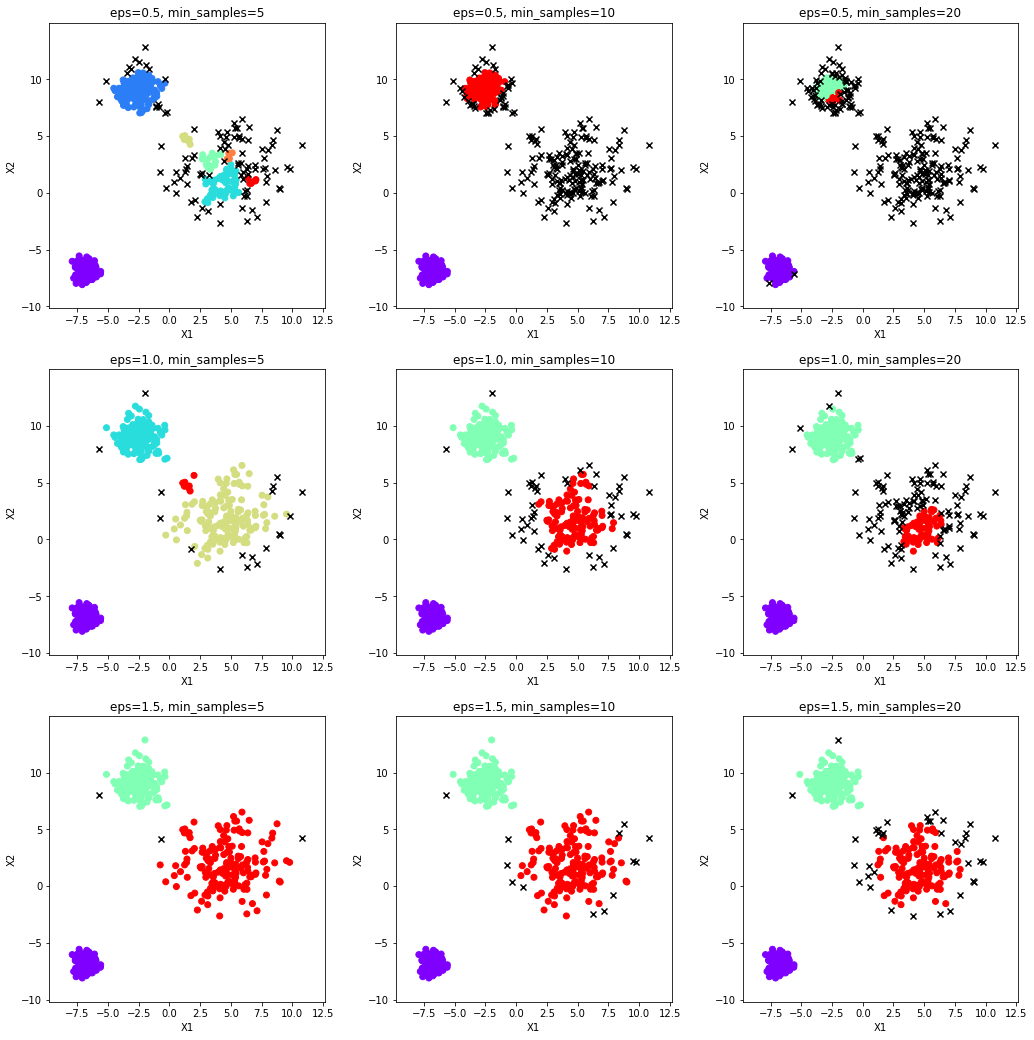

In [2]:
# Random normal clusters

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, y = make_blobs(n_samples=500, cluster_std=[1.0, 2.0, 0.5], random_state=42)

plot_dbscan(X=X, eps=[0.5, 1.0, 1.5], min_samples=[5, 10, 20])

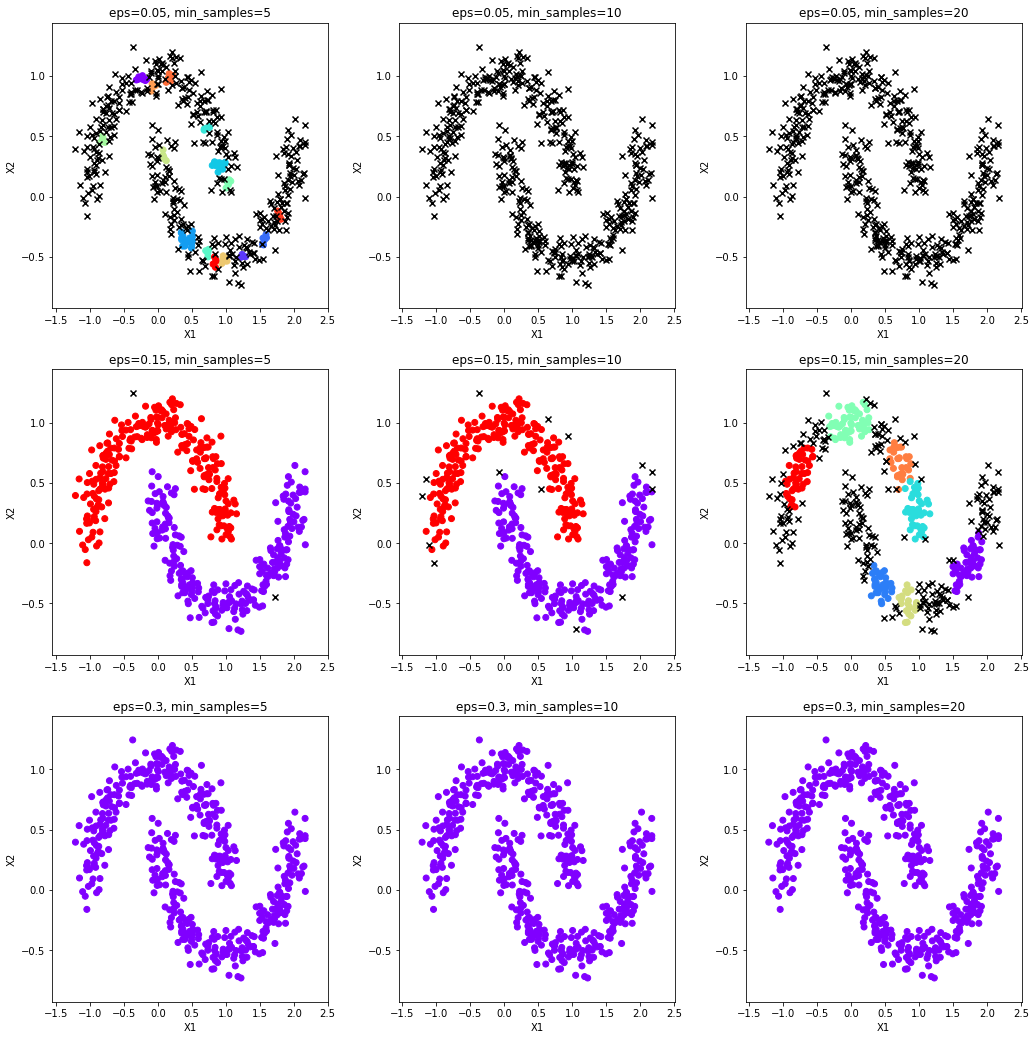

In [17]:
# Non-linear clusters

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

plot_dbscan(X=X, eps=[0.05, 0.15, 0.30], min_samples=[5, 10, 20])

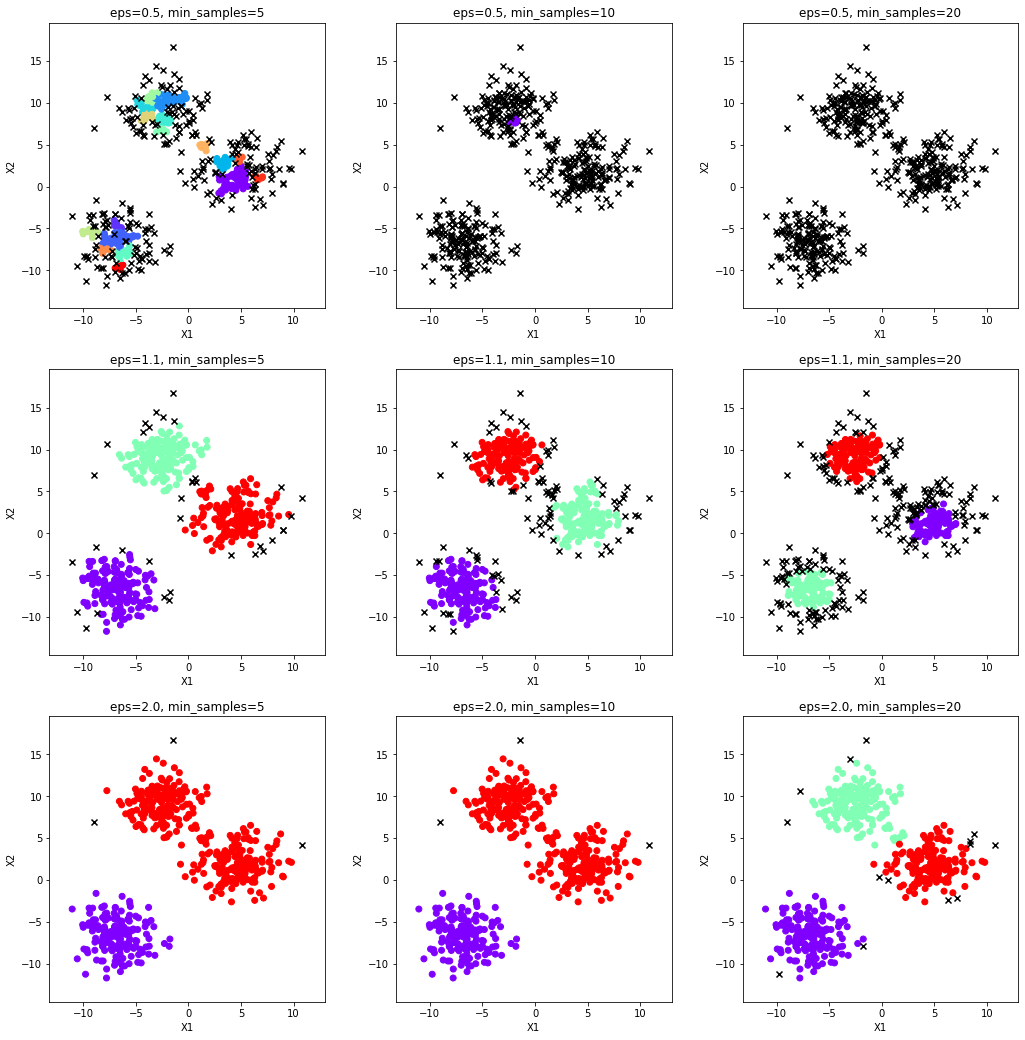

In [4]:
# Random normal clusters but varying the number of points in the neighborhood

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, y = make_blobs(n_samples=500, cluster_std=2.0, random_state=42)

plot_dbscan(X=X, eps=[0.5, 1.1, 2.0], min_samples=[5, 10, 20])

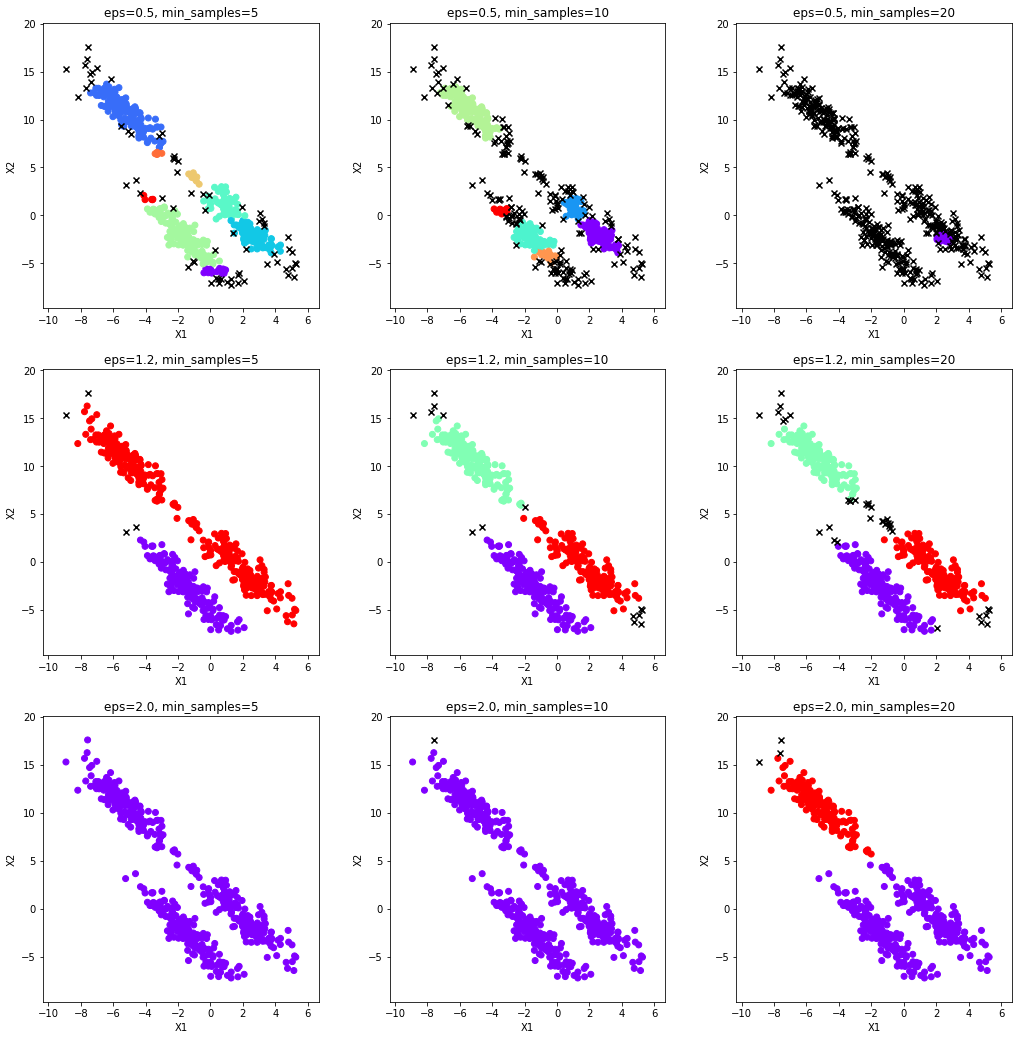

In [5]:
# Purely linear clusters

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, y = make_blobs(n_samples=500, cluster_std=2.0, random_state=42)

transformation = [[0.6, -0.6], [-0.4, 1.0]]
X = np.dot(X, transformation)

plot_dbscan(X=X, eps=[0.5, 1.2, 2.0], min_samples=[5, 10, 20])

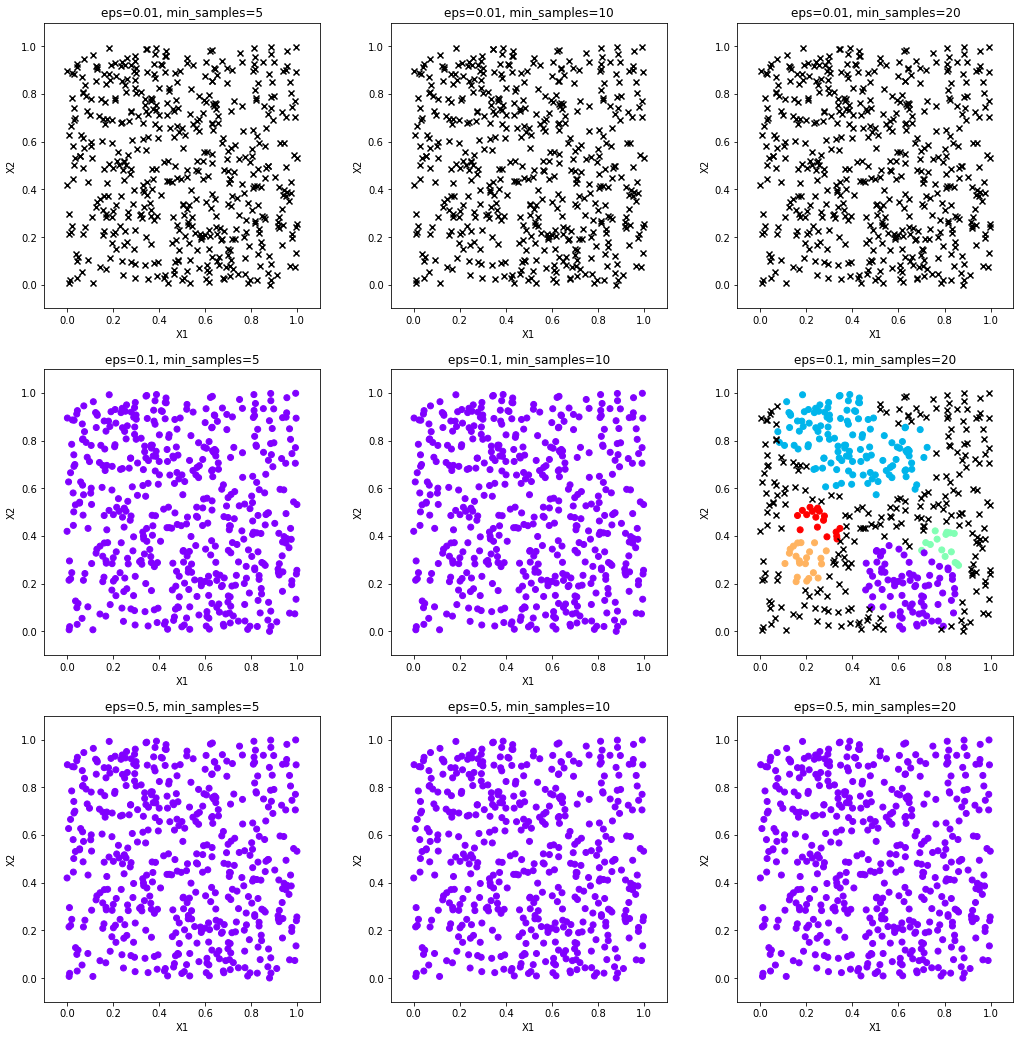

In [6]:
# Random noise

import numpy as np 
from sklearn.cluster import DBSCAN

X = np.random.rand(500, 2)

plot_dbscan(X=X, eps=[0.01, 0.1, 0.5], min_samples=[5, 10, 20])

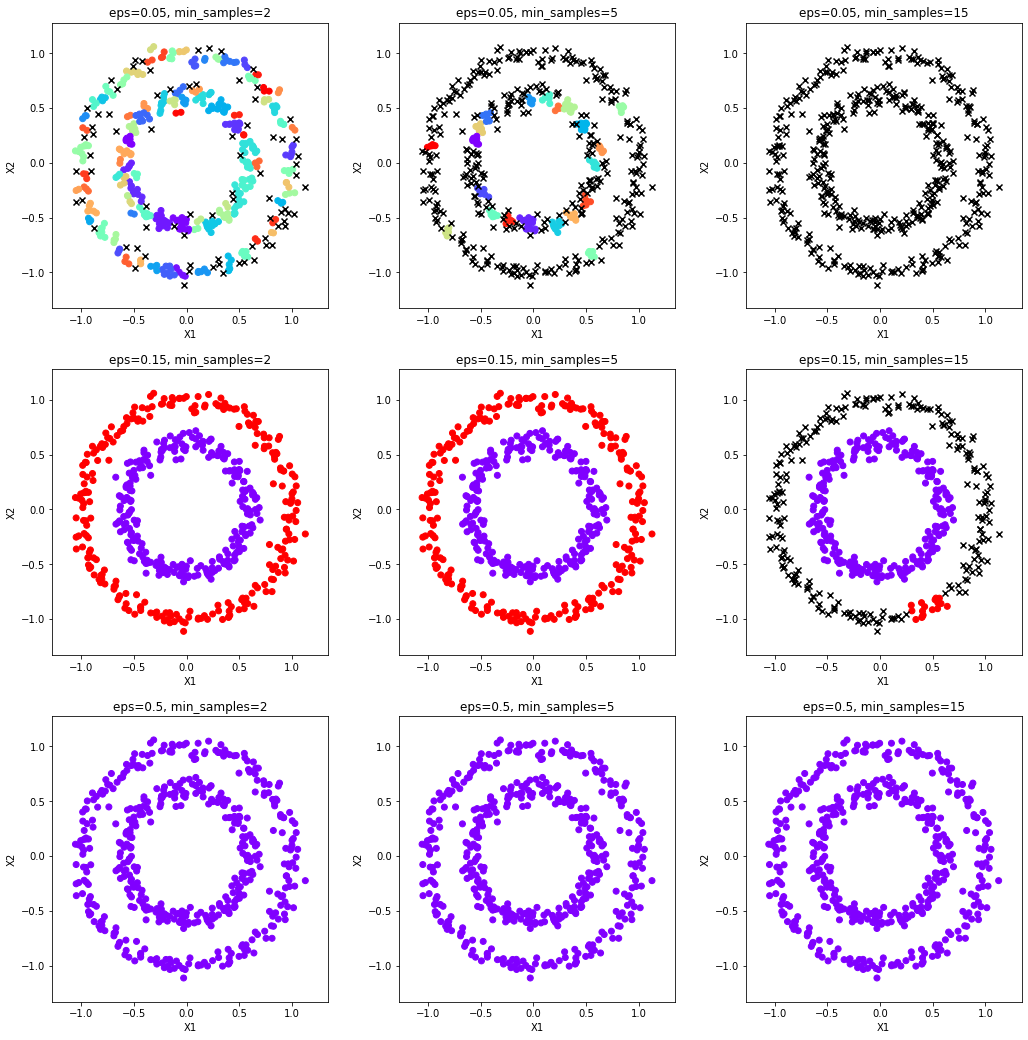

In [7]:
# Circular clusters

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, y = make_circles(n_samples=500, factor=0.6, noise=.05)

plot_dbscan(X=X, eps=[0.05, 0.15, 0.50], min_samples=[2, 5, 15])

## Case of study: Shopping habits

Let us test the algorithm against the dataset [UCI](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset). This dataset contains a set of features of the online sessions of costumers of an online shop. According to the description of the dataset:


> The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
>
> "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
>
> The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
>
>The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [20]:
import pandas as pd

raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')
target = raw['Revenue']
raw.drop('Revenue', axis=1, inplace=True)
raw.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [21]:
# We transform the 7 categorical features with a OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

nominal_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
numeric_features = list(set(raw.columns) - set(nominal_features))
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(copy=False), numeric_features),
        ('cat', OneHotEncoder(categories='auto'), nominal_features)])

datos = preprocessor.fit_transform(raw)

In [22]:
# Since the `eps` parameter is based on the distance of the dataset,
# it is interesting to know the maximum existing distance (the scale of the dataset).

from sklearn.neighbors import kneighbors_graph
distances = kneighbors_graph(datos, 149, mode='distance')

distances.todense().flatten().max()

3.1891477485681894

In [12]:
# Running DBSCAN

from sklearn.cluster import DBSCAN

modelo_dbs = DBSCAN(eps=7.0, min_samples=75, metric='manhattan')
labs = modelo_dbs.fit_predict(datos)

In [13]:
# Some quality measures

from sklearn.metrics import silhouette_score, adjusted_rand_score

print('Silhouette: ', silhouette_score(datos, labs))
print('Rand Index (with ground truth): ', adjusted_rand_score(target, labs))

Silhouette:  0.1756643286538443
Rand Index (con ground truth):  -0.0001324710987999104


**Pro tip:** There is a process for determining the optimal values of the hyperparameters for DBSCAN:

1. Compute the maximum distance of each point to its $minPoints-1$ closed neighbors.
2. Sort increasingly the distances, plot them and choose $\varepsilon$ as the value where the curve has an inflection point (the 'elbow').

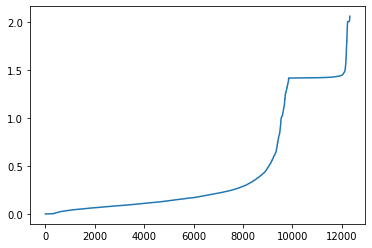

In [14]:
import numpy as np

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neigh = NearestNeighbors(n_neighbors=75)
nbrs = neigh.fit(datos)
distances, indices = nbrs.kneighbors(datos)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [16]:
modelo_dbs = DBSCAN(eps=0.7, min_samples=75)
labs = modelo_dbs.fit_predict(datos)
print('Silhouette: ', silhouette_score(datos, labs))
print('Rand Index (with ground truth): ', adjusted_rand_score(target, labs))

Silhouette:  -0.17544101751795876
Rand Index (with ground truth):  0.02075168281473772


---

Created by **Raúl Lara** (raul.lara@upm.es) y **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">